In [40]:
from scipy import linalg

In [41]:
import numpy as np

In [42]:
arr = np.array([[1,2],[3,4]])

In [43]:
arr

array([[1, 2],
       [3, 4]])

## 计算矩阵的行列式

In [44]:
linalg.det(arr)

-2.0

## 计算矩阵的逆

In [45]:
linalg.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## 进行线性插值

In [46]:
measured_time = np.linspace(0,1,10)

In [47]:
noise = (np.random.random(10)*2-1)/10
noise

array([ 0.02826685, -0.01585235,  0.09235889, -0.04400081,  0.0506773 ,
        0.08281503,  0.03597344, -0.07564496,  0.04230798, -0.09655975])

In [48]:
measureds = np.sin(2*np.pi *mearsued_time) +noise

In [49]:
measureds

array([ 0.02826685,  0.62693526,  1.07716664,  0.8220246 ,  0.39269744,
       -0.25920511, -0.83005196, -1.06045271, -0.60047963, -0.09655975])

In [50]:
from scipy.interpolate import interp1d

In [51]:
from matplotlib import pyplot as plt

In [61]:
#创建一个线性函数
linear_interp = interp1d(measured_time,measureds)
linear_interp

In [62]:
interpolation_time = np.linspace(0, 1, 50)

In [63]:
y_2 = linear_interp(interpolation_time)

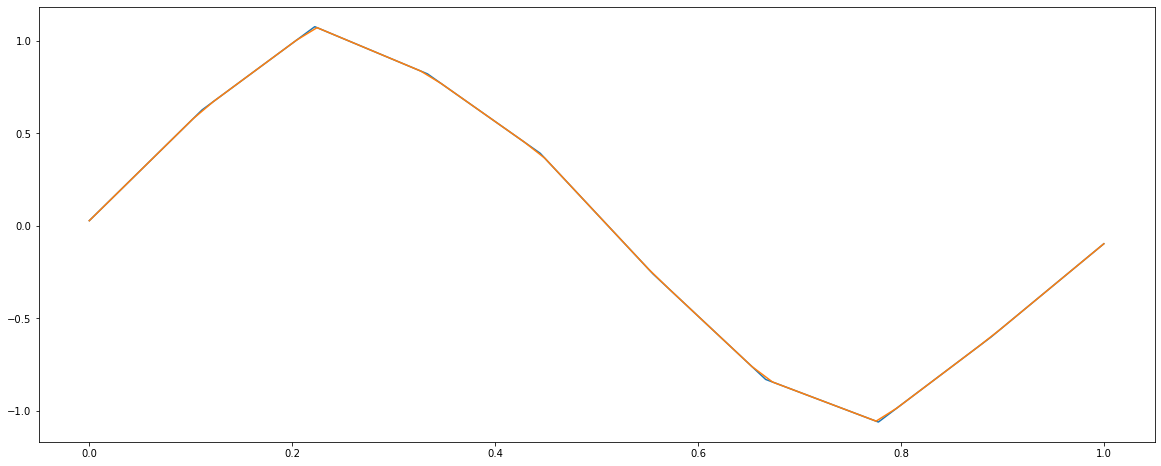

In [64]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.plot(measured_time,measureds)
ax.plot(interpolation_time,y_2)

## 优化和拟合

In [66]:
from scipy import optimize

In [67]:
x_data = np.linspace(-5,5,50)

In [68]:
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size = 50)

In [69]:
def test_fun(x,a,b):
    return  a * np.sin(b*x)

In [77]:
#根据曲线进行拟合
params, params_covariance = optimize.curve_fit(test_fun, x_data, y_data, p0=[2, 2])

In [72]:
params

array([2.77851503, 1.45838746])

In [75]:
y_fit = test_fun(x_data,params[0],params[1])
y_fit

array([-2.35108891, -1.81349279, -1.1164332 , -0.32120377,  0.50226964,
        1.28157765,  1.94819438,  2.44350311,  2.72395051,  2.76487636,
        2.562682  ,  2.13514671,  1.51986438,  0.77093783, -0.04577858,
       -0.85846961, -1.59567395, -2.19256801, -2.59666589, -2.77243457,
       -2.70441843, -2.39859823, -1.88186527, -1.19965673, -0.41196037,
        0.41196037,  1.19965673,  1.88186527,  2.39859823,  2.70441843,
        2.77243457,  2.59666589,  2.19256801,  1.59567395,  0.85846961,
        0.04577858, -0.77093783, -1.51986438, -2.13514671, -2.562682  ,
       -2.76487636, -2.72395051, -2.44350311, -1.94819438, -1.28157765,
       -0.50226964,  0.32120377,  1.1164332 ,  1.81349279,  2.35108891])

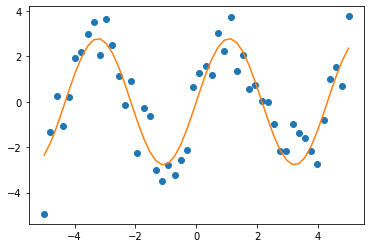

In [76]:
plt.plot(x_data,y_data,'o')
plt.plot(x_data,y_fit)

## 求标量函数的最小值

In [78]:
def f(x):
...     return x**2 + 10*np.sin(x)

In [79]:
x = np.arange(-10,10,0.1)

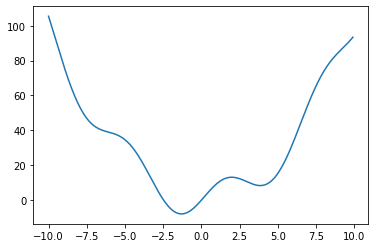

In [80]:
plt.plot(x,f(x))

In [81]:
result = optimize.minimize(f,x0 = 0)

In [82]:
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [83]:
optimize.minimize(f, x0=0, method="L-BFGS-B")   #此种方法只能找到局部最小值

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.68753901e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644017])

In [84]:
optimize.minimize(f, x0=3, method="L-BFGS-B")   #此种方法只能找到局部最小值

      fun: array([8.31558558])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.77635685e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([3.83746709])

In [89]:
## 寻找标量函数的根

In [95]:
optimize.root(f,x0 =0) #仅能找到最近的一个根

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 3
     qtf: array([0.])
       r: array([-10.00000001])
  status: 1
 success: True
       x: array([0.])

In [96]:
## 统计和随机数

In [97]:
from scipy import stats

In [99]:
stats.norm.pdf([3])

array([0.00443185])

In [100]:
## 进行t检验

In [101]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)

In [102]:
b

array([-0.75873766,  0.46461966,  0.80907742,  1.93989234,  1.63543768,
       -0.93927796,  0.33444169,  0.01870257, -0.26618858,  1.66345318])

In [103]:
## 观察a,b的均值是否有显著不同

In [104]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-2.0931343204589243, pvalue=0.038679072642489126)

## 数值积分

In [106]:
from scipy.integrate import quad